<a href="https://colab.research.google.com/github/aditigedam/ML/blob/main/TaxiHotspot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

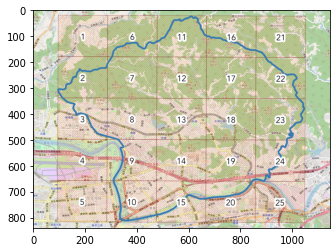

In [65]:
img = plt.imread('/content/drive/MyDrive/datasets/taxihotspot/zones.png')
plt.imshow(img)
plt.show()

In [66]:
df_zones = pd.read_csv('/content/drive/MyDrive/datasets/taxihotspot/zones.csv')
df_zones.shape

(25, 5)

In [67]:
df_zones.head(25)


Zone_ID        left        top       right     bottom
0         1  121.551408  25.115518  121.566858  25.102831
1         2  121.551408  25.102831  121.566858  25.090144
2         3  121.551408  25.090144  121.566858  25.077457
3         4  121.551408  25.077457  121.566858  25.064770
4         5  121.551408  25.064770  121.566858  25.052083
5         6  121.566858  25.115518  121.582308  25.102831
6         7  121.566858  25.102831  121.582308  25.090144
7         8  121.566858  25.090144  121.582308  25.077457
8         9  121.566858  25.077457  121.582308  25.064770
9        10  121.566858  25.064770  121.582308  25.052083
10       11  121.582308  25.115518  121.597758  25.102831
11       12  121.582308  25.102831  121.597758  25.090144
12       13  121.582308  25.090144  121.597758  25.077457
13       14  121.582308  25.077457  121.597758  25.064770
14       15  121.582308  25.064770  121.597758  25.052083
15       16  121.597758  25.115518  121.613208  25.102831
16       17  121.597758  25.102831  121.613208  25.090144
17       18  121.597758  25.090144  121.613208  25.077457
18       19  121.597758  25.077457  121.613208  25.064770
19       20  121.597758  25.064770  121.613208  25.052083
20       21  121.613208  25.115518  121.628658  25.102831
21       22  121.613208  25.102831  121.628658  25.090144
22       23  121.613208  25.090144  121.628658  25.077457
23       24  121.613208  25.077457  121.628658  25.064770
24       25  121.613208  25.064770  121.628658  25.052083

In [68]:
df_zones.tail()


Zone_ID        left        top       right     bottom
20       21  121.613208  25.115518  121.628658  25.102831
21       22  121.613208  25.102831  121.628658  25.090144
22       23  121.613208  25.090144  121.628658  25.077457
23       24  121.613208  25.077457  121.628658  25.064770
24       25  121.613208  25.064770  121.628658  25.052083

In [69]:
df_train = pd.read_csv('/content/drive/MyDrive/datasets/taxihotspot/test_hire_stats.csv')
df_train.shape

(6048, 5)

In [70]:
df_train.head()

Test_ID  Zone_ID      Date  Hour_slot  Hire_count
0        0        7  2017/2/1          0         NaN
1        1        7  2017/2/1          1         NaN
2        2        7  2017/2/1          2         NaN
3        3        7  2017/2/1          3         NaN
4        4        7  2017/2/1          4         NaN

In [71]:
df_train["tdate"] = pd.to_datetime(df_train["Date"])

In [72]:
df_train.head()

Test_ID  Zone_ID      Date  Hour_slot  Hire_count      tdate
0        0        7  2017/2/1          0         NaN 2017-02-01
1        1        7  2017/2/1          1         NaN 2017-02-01
2        2        7  2017/2/1          2         NaN 2017-02-01
3        3        7  2017/2/1          3         NaN 2017-02-01
4        4        7  2017/2/1          4         NaN 2017-02-01

In [79]:
#0 == Monday
#1 == Tuesday
#2 == Wednesday
#3 == Thursday
#4 == Friday
#5 == Saturday
#6 == Sunday
df_train.iloc[6047]['tdate'].weekday()

1

## **Encode input**

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
#Read training data
df_train = pd.read_csv('/content/drive/MyDrive/datasets/taxihotspot/train_hire_stats.csv')
df_train.shape

(219600, 4)

In [82]:
#Declare weekday
weekday = np.ones((len(df_train),), dtype=int)

In [83]:
print(weekday)

[1 1 1 ... 1 1 1]


In [84]:
#Compute weekday & workday
#weekday()
#0 == Monday, #1 == Tuesday, #2 == Wednesday,  #3 == Thursday,  #4 == Friday,  #5 == Saturday, #6 == Sunday
from datetime import datetime

for index, row in df_train.iterrows():
    dd=datetime.strptime(row['Date'], "%Y-%m-%d")
    weekday[index]= dd.weekday() 

In [85]:
#Build a new dataframe from the training data
RawX = pd.DataFrame(df_train[["Zone_ID", "Hour_slot"]])
RawX['weekday'] = weekday

In [86]:
#See the raw input data
RawX.head()

Zone_ID  Hour_slot  weekday
0        1          0        0
1        1          1        0
2        1          2        0
3        1          3        0
4        1          4        0

In [87]:
RawX.info

<bound method DataFrame.info of         Zone_ID  Hour_slot  weekday
0             1          0        0
1             1          1        0
2             1          2        0
3             1          3        0
4             1          4        0
...         ...        ...      ...
219595       25         19        1
219596       25         20        1
219597       25         21        1
219598       25         22        1
219599       25         23        1

[219600 rows x 3 columns]>

In [88]:
#Use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [89]:
#Build encoder
enc.fit_transform(RawX)
enc.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([0, 1, 2, 3, 4, 5, 6])]

In [90]:
#Transform data into one hot vector
X = enc.transform(RawX).toarray()
X.shape

(219600, 56)

In [91]:
#See the cooked input data
X[0:3, :]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0.]])

In [92]:
s=df_train["Hire_count"]
s.describe()

count    219600.000000
mean         18.755974
std          30.935933
min           0.000000
25%           0.000000
50%           4.000000
75%          25.000000
max         339.000000
Name: Hire_count, dtype: float64

In [93]:
#Resize y into (0,1)
y = df_train["Hire_count"].values/339.0
y.shape

(219600,)

In [94]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout,Flatten

In [95]:
# create and fit a Baseline Neural Network Model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=56))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))


In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               7296      
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8,597
Trainable params: 8,597
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=10, batch_size=1024, verbose=1)

Epoch 1/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0029
Epoch 2/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 3/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 4/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 5/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 6/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 7/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 8/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 9/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 10/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0011


In [98]:
df_test = pd.read_csv('/content/drive/MyDrive/datasets/taxihotspot/test_hire_stats.csv')
df_test.shape

(6048, 5)

In [99]:
#Declare weekday & workday
weekday2 = np.ones((len(df_test),), dtype=int)

In [100]:
for index, row in df_test.iterrows():
    dd=datetime.strptime(row['Date'], "%Y/%m/%d")
    weekday2[index]= dd.weekday() 

In [101]:
Test = pd.DataFrame(df_test[["Zone_ID", "Hour_slot"]])
Test['weekday'] = weekday2

In [102]:
Xtest = enc.transform(Test).toarray()
Xtest.shape

(6048, 56)

In [103]:
yt = model.predict(Xtest)*339.0


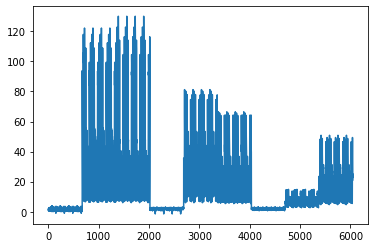

In [104]:
plt.plot(yt)


In [105]:
dfOut = pd.DataFrame(yt)


In [106]:
dfOut.to_csv('Result2.csv')